In [18]:
import pandas as pd  
import numpy as np 
import scipy as sp          #To check the data
import matplotlib.pyplot as plt 
import seaborn as sns       #To plot

%matplotlib inline

Data from https://www.kaggle.com/shivamb/netflix-shows 

In [19]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


We begin by looking at the big picture of the data.

In [20]:
netflix.shape       #Count rows and columns

(6234, 12)

In [21]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [22]:
netflix.describe(include=[np.object, pd.Categorical]).T     #Some categorial data stats

,count,unique,top,freq
type,6234,2,Movie,4265
title,6234,6172,Love,3
director,4265,3301,"Raúl Campos, Jan Suter",18
cast,5664,5469,David Attenborough,18
country,5758,554,United States,2032
date_added,6223,1524,"January 1, 2020",122
rating,6224,14,TV-MA,2027
duration,6234,201,1 Season,1321
listed_in,6234,461,Documentaries,299
description,6234,6226,A surly septuagenarian gets another chance at ...,3


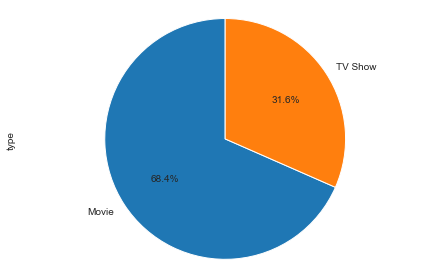

In [23]:
x = netflix['type'].value_counts()  #Split the data into Movies and TV shows
x.plot.pie(y=x.index,
           shadow=False, 
           startangle=90,
           autopct='%1.1f%%')
plt.tight_layout()
plt.axis('equal')
plt.show()

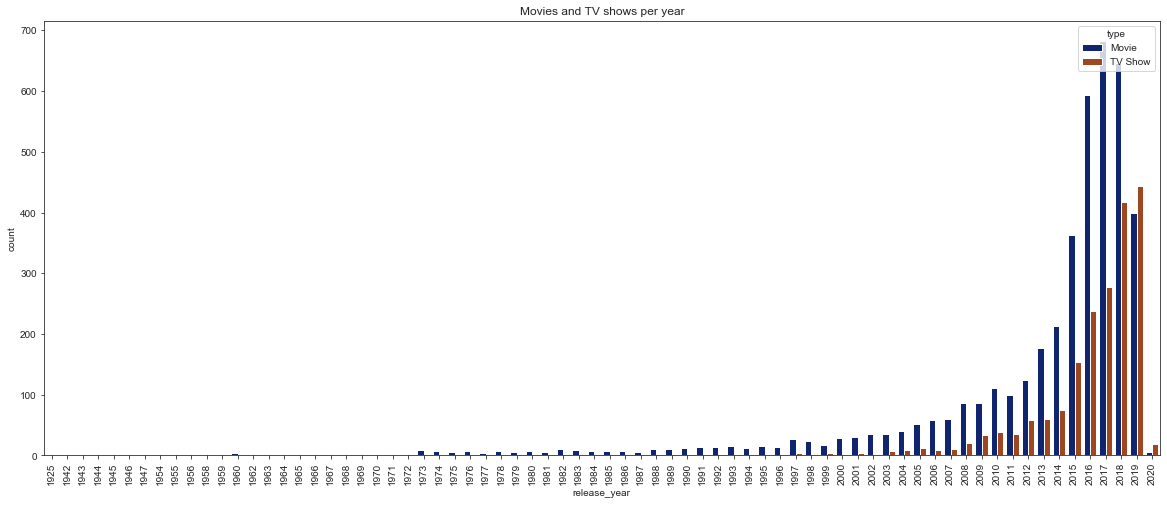

In [24]:
ax = sns.countplot(x='release_year', hue='type', data=netflix, palette='dark')
ax.figure.set_size_inches(20, 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Movies and TV shows per year')
plt.show()

In the last years they've been focusing more on TV shows than movies.

Let's get two dataframes, one for movies and one for series

In [25]:
movies = netflix.set_index('type').loc['Movie'].reset_index().drop('type', 1)       #Only the Movies
series = netflix.set_index('type').loc['TV Show'].reset_index().drop('type', 1)     #Only the TV Shows

This function will help us later

In [26]:
from collections import Counter


def most_common(data, column, pal, x):
    counting=[]
    for row in data[pd.notnull(data[column])][column]:  #Makes a list with all the directors
        row_list = row.split(', ')
        counting.extend(row_list)


    top_directors = dict(Counter(counting).most_common(10))        #Counting the repeated items in the column
    top_directors = pd.DataFrame(top_directors.items())

    column = column.title()                   
    ax = sns.barplot(x=top_directors[0], y=top_directors[1],        #Plotting
                     data=top_directors, palette = pal)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    sns.set_style('ticks')
    plt.xlabel('{}'.format(column))                                 #Get the column name as the X axis
    plt.ylabel('Number of '+ '{}'.format(x))
    plt.title('Most popular' + ' ' + '{}'.format(column))
    ax.figure.set_size_inches(14, 6)
    sns.despine(ax=ax)
    plt.show()

We begin the analysis with the movies data.

In [27]:
movies.describe(include=[np.object, pd.Categorical]).T 

,count,unique,top,freq
title,4265,4241,The Silence,3
director,4137,3198,"Raúl Campos, Jan Suter",18
cast,3905,3763,Samuel West,10
country,4070,482,United States,1482
date_added,4264,1045,"January 1, 2020",111
rating,4257,14,TV-MA,1348
duration,4265,186,90 min,111
listed_in,4265,249,Documentaries,299
description,4265,4257,A surly septuagenarian gets another chance at ...,3


In [28]:
movies['rating'].value_counts()

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64

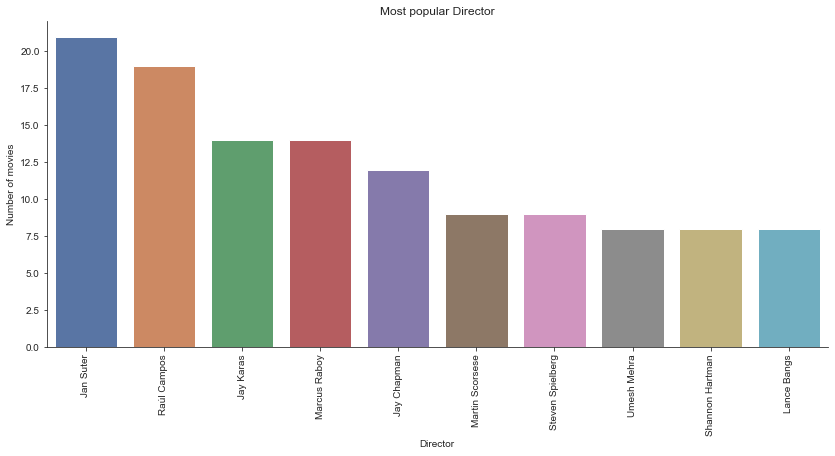

In [29]:
most_common(movies, 'director', 'deep', 'movies')

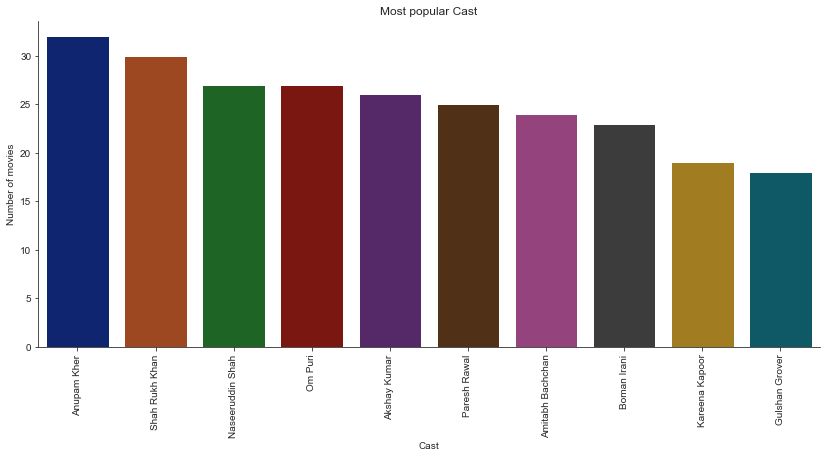

In [30]:
most_common(movies, 'cast', 'dark', 'movies')

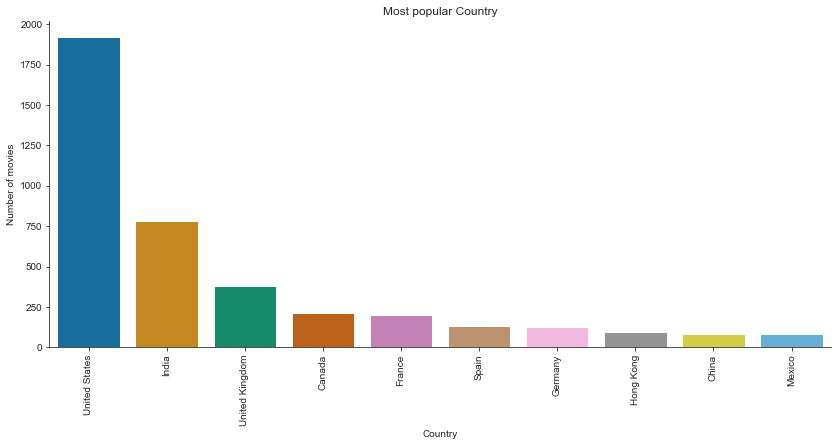

In [31]:
most_common(movies, 'country', 'colorblind', 'movies')

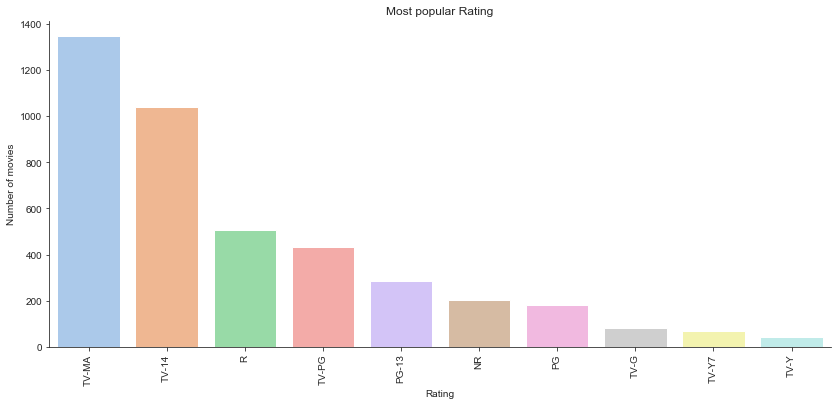

In [32]:
most_common(movies, 'rating', 'pastel', 'movies')

We can check the most commons director-actor couples.

In [48]:
from itertools import product

movies_2 = movies.dropna(subset=['director', 'cast'])
counting = []
for j in range(0, movies_2.shape[0]):
    directors = movies_2.iloc[j]['director'].split(', ')
    cast = movies_2.iloc[j]['cast'].split(', ')
    counting.extend(product(directors, cast))


couples = Counter(counting).most_common(10)

data=[]
for i in range(0,10):
    (couple, number_of_movies)=couples[i]
    data.append([couple[0], couple[1], number_of_movies])
    

data = pd.DataFrame(data, columns=['Director', 'Actor', 'Number of movies'])
data

,Director,Actor,Number of movies
0,S.S. Rajamouli,Prabhas,7
1,S.S. Rajamouli,Rana Daggubati,7
2,S.S. Rajamouli,Anushka Shetty,7
3,S.S. Rajamouli,Tamannaah Bhatia,7
4,S.S. Rajamouli,Sathyaraj,7
5,S.S. Rajamouli,Nassar,7
6,S.S. Rajamouli,Ramya Krishnan,7
7,Tilak Shetty,Smita Malhotra,6
8,Hakan Algül,Ata Demirer,6
9,Yılmaz Erdoğan,Yılmaz Erdoğan,6


Let's do the same for the TV shows data.

In [49]:
series.describe(include=[np.object, pd.Categorical]).T 

,count,unique,top,freq
title,1969,1958,Lovesick,2
director,128,121,Alastair Fothergill,3
cast,1759,1726,David Attenborough,14
country,1688,154,United States,550
date_added,1959,912,"January 1, 2016",21
rating,1967,11,TV-MA,679
duration,1969,15,1 Season,1321
listed_in,1969,212,Kids' TV,159
description,1969,1969,Shrek dares his friends to bring on the scary ...,1


In [50]:
series['rating'].value_counts()

TV-MA       679
TV-14       660
TV-PG       269
TV-Y        102
TV-Y7       100
TV-G         69
TV-Y7-FV     68
NR           16
R             2
G             1
PG            1
Name: rating, dtype: int64

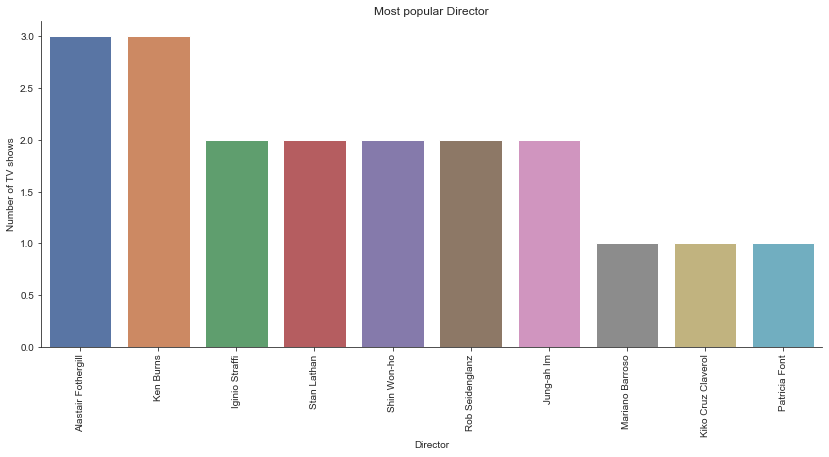

In [51]:
most_common(series, 'director', 'deep', 'TV shows')

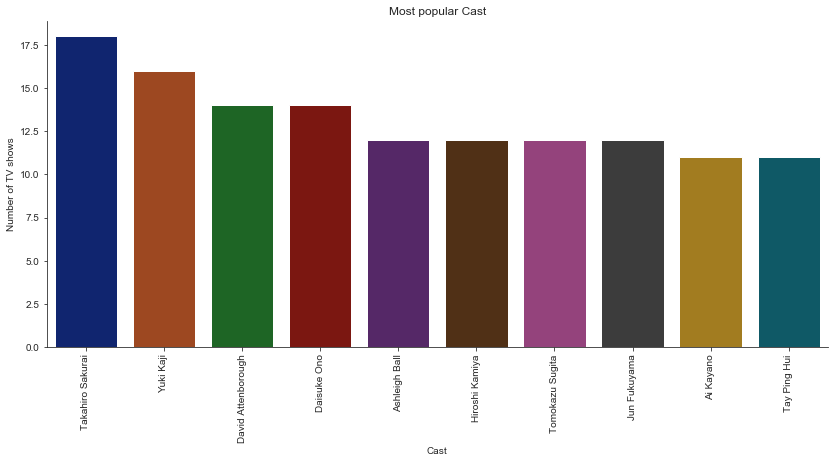

In [52]:
most_common(series, 'cast', 'dark', 'TV shows')

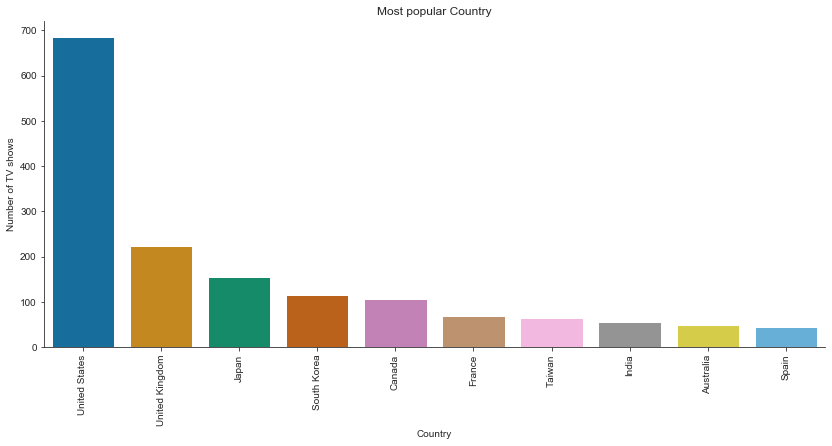

In [53]:
most_common(series, 'country', 'colorblind', 'TV shows')

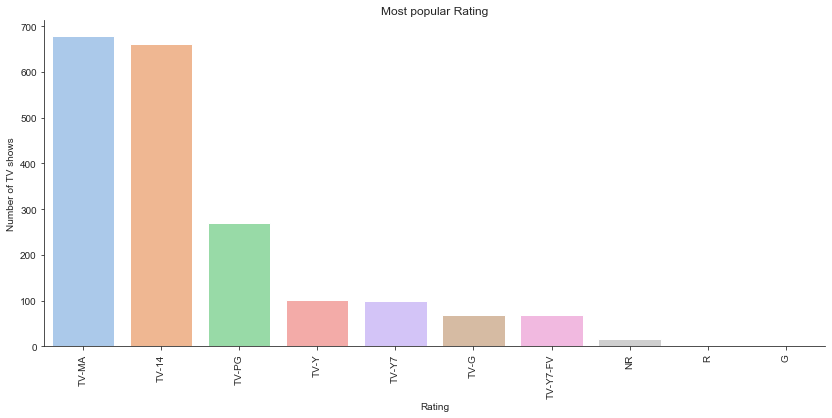

In [55]:
most_common(series, 'rating', 'pastel', 'TV shows')

In [54]:
from itertools import product           #Too lazy to make a new function

series_2 = series.dropna(subset=['director', 'cast'])
counting = []
for j in range(0, series_2.shape[0]):
    directors = series_2.iloc[j]['director'].split(', ')
    cast = series_2.iloc[j]['cast'].split(', ')
    counting.extend(product(directors, cast))


couples = Counter(counting).most_common(10)

data=[]
for i in range(0,10):
    (couple, number_of_series)=couples[i]
    data.append([couple[0], couple[1], number_of_series])
    

data = pd.DataFrame(data, columns=['Director', 'Actor', 'Number of TV shows'])
data

,Director,Actor,Number of TV shows
0,Alastair Fothergill,David Attenborough,3
1,Stan Lathan,Dave Chappelle,2
2,Shin Won-ho,Sung Dong-il,2
3,Shin Won-ho,Lee Il-hwa,2
4,Mariano Barroso,Emma Suárez,1
5,Mariano Barroso,Jorge Bosch,1
6,Mariano Barroso,Álvaro Cervantes,1
7,Mariano Barroso,Carmen Machi,1
8,Mariano Barroso,Inma Cuesta,1
9,Mariano Barroso,Eduard Fernández,1
